# Dataset Draft

Dennis Chan 15833526 

Stanley Si Lin Wu 15417190 

Michael Dong 15804232 

Sander Neele 15857719 

Groep nummer: B1 (#1) 

# Titel
Factoren die mensen zijn voorkeur voor films of series beïnvloeden

# Beschrijving

IMDb is de bekendste website voor het beoordelen van films en series en er bestaat duidelijke tegenstellingen tussen films en series. Sommige mensen vinden films beter, terwijl sommige juist series beter vinden. Maar welke factoren bepalen dan deze voorkeuren? In dit project gaan we dus de data analyseren om te bepalen wat precies deze verschillen veroorzaakt. Sommigen vinden series leuker vanwege de grote hoeveelheid detail en zij liever thuis kijken, terwijl anderen films waarderen omdat ze een compleet verhaal in korte tijd vertellen en liever in de bioscoop kijken.  

In [107]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Perspectief 1

Movies is een behoefte door hun korte tijdsduur en snelle inspanning en eenmalige beleving. Terwijl series beter zijn omdat ze betere karakterontwikkeling over langere periode. Daarnaast past thuiskijken beter bij moderne levenstijl.  


# Perspectief 2

Moderne films en series hebben betere technologieën zoals CGI en de hogere productiebudget, waardoor ze dus visueel er beter uit zien. Aan de andere kant hebben we oude klassieke films die vaak meer echte verhalen hebben zonder te veel computer trucjes. Hierdoor moesten de acteurs juist goed acteren. Daarom kijken mensen deze films nog steeds deze klassiekers. 

Argument: Hoewel meeste mensen van moderne films houden, zien we nogsteeds dat er mensen zijn die genieten van ouderwetse films door hun acteurstijl. Het is te zien aan de heatmap, de aantal votes bestaat er nog voor 1920


# Dataset 1: IMDB Top 1000 Movies

https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-movies 

Hoeveelheid datapunten: 1000 records
 
Hoeveelheid variabelen in de dataset: 6 variabelen 

De database bevat de top 1000 best beoordeelde films op IMDb, elk met minstens 10.000 ratings. Voor elke film is de titel, genre, aantal votes, rating en de releasedatum genoteerd. Deze gegevens zijn verkregen via een (onofficiële) IMDb API en kunnen inzicht geven in trends en voorkeuren van gebruikers. 

In [108]:
data = pd.read_csv('movies.csv')
data.head(n=10)


,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,3057007,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2134065,1972
2,tt0252487,The Chaos Class,Comedy,9.2,44602,1975
3,tt33175825,Attack on Titan the Movie: The Last Attack,"Action, Adventure, Animation",9.2,17305,2024
4,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.1,16474,1993
5,tt0468569,The Dark Knight,"Action, Crime, Drama",9.0,3031913,2008
6,tt0167260,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",9.0,2085825,2003
7,tt0108052,Schindler's List,"Biography, Drama, History",9.0,1529796,1993
8,tt0071562,The Godfather Part II,"Crime, Drama",9.0,1435894,1974
9,tt0050083,12 Angry Men,"Crime, Drama",9.0,931547,1957


# Dataset 2: IMBD Top 1000 Series


https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series 

Hoeveelheid datapunten: 1000 records 

Hoeveelheid variabelen in de dataset: 6 variabelen


De database bevat een top 1000 top rated TV series in IMDb met minstens 10000 ratings. Daarin staat de titel, genre, aantal votes, rating en de releasedatum van de film. De data is verkregen door middel van een (Onofficieel) IMDb API, te vinden op RapidAPI. 


In [109]:
data = pd.read_csv('tvseries.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2341969,2008
1,tt0185906,Band of Brothers,"Action, Drama, History",9.4,564041,2001
2,tt0795176,Planet Earth,"Documentary, Family",9.4,227819,2006
3,tt5491994,Planet Earth II,Documentary,9.4,166992,2016
4,tt5152226,Tree of Life,Drama,9.4,18826,2014
5,tt7366338,Chernobyl,"Drama, History, Thriller",9.3,954055,2019
6,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,408049,2005
7,tt0306414,The Wire,"Crime, Drama, Thriller",9.3,404808,2002
8,tt30263074,Sapne Vs Everyone,Drama,9.3,73898,2023
9,tt6769208,Blue Planet II,Documentary,9.3,52095,2017


In [110]:
# Laad beide CSV-bestanden
df1 = pd.read_csv("movies.csv")  # Hier zit bijvoorbeeld 'Country' in
df2 = pd.read_csv("tvseries.csv")  # Hier zit 'Location' i.p.v. 'Country' in

# 2. Voeg een 'type' kolom toe om films/series te onderscheiden
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Groepeer per releaseYear en tel votes op
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "numVotes": "sum",  # Tel alle votes op per jaar
        "title": lambda x: " | ".join(x),  # Combineer titels met scheidingsteken
        "type": lambda x: " + ".join(x)    # Combineer types (film + serie)
    })
    .rename(columns={"title": "titles_combined"})  # Hernoem voor duidelijkheid
)

# 5. Sla het resultaat op (optioneel)
result.to_csv("combined_votes_by_year.csv", index=True)

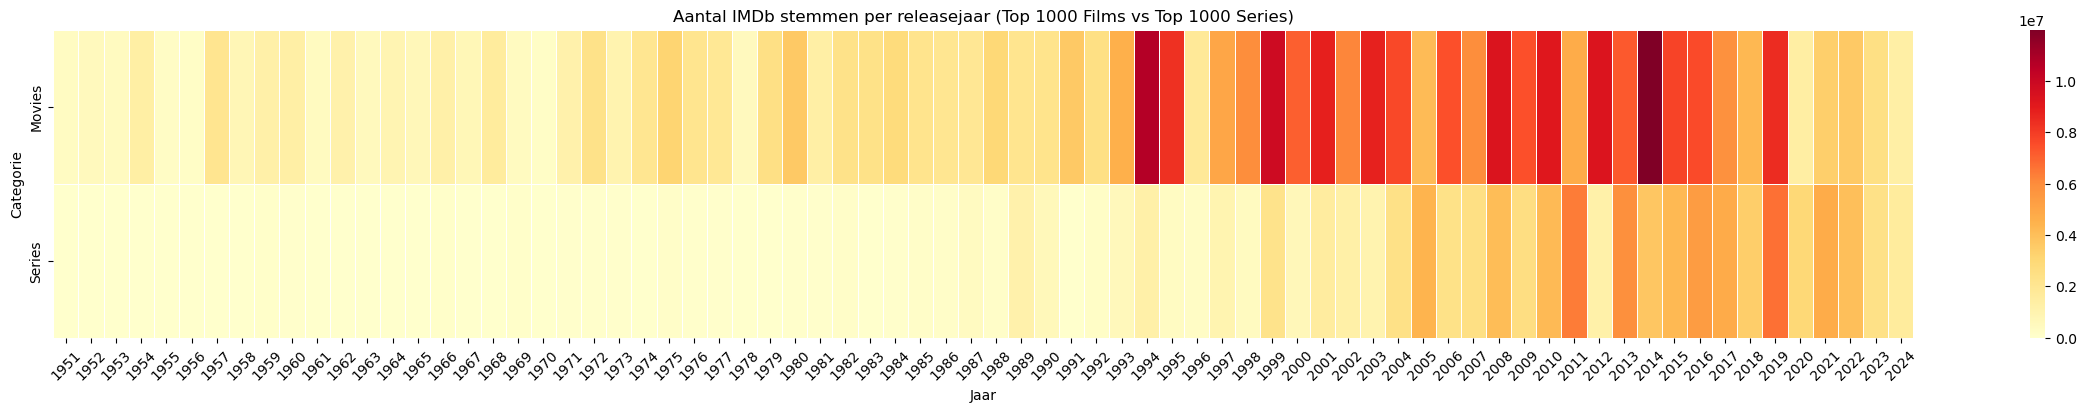

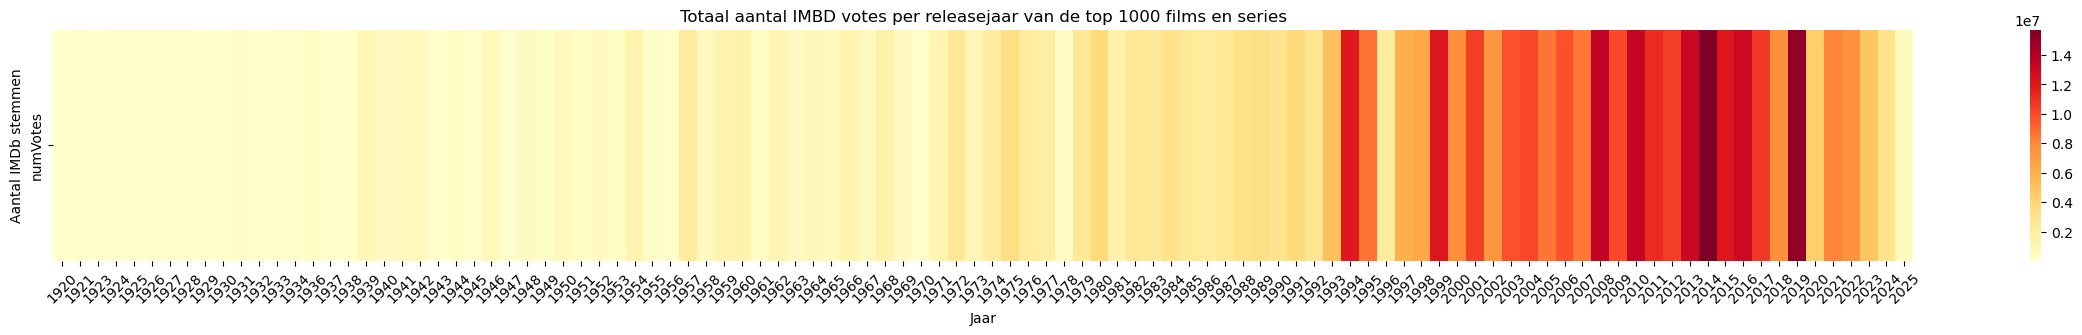

In [111]:

############# FILMS + SERIES APART######################### 



# --- Movies ---
movies_df = pd.read_csv("movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

# --- Plot ---
plt.figure(figsize=(30, 4))
sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,       # <-- hier komt de lijn
    linecolor='white'     # <-- witte lijnen
)
plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()




#################### gecombineerd TVSeries en Films top 1000 ################

df = pd.read_csv("combined_votes_by_year.csv")

#voeg het totale aantal votes per jaar
votes_per_year = df.groupby('releaseYear')['numVotes'].sum().reset_index()

#lijst van alle jaren in de dataset
all_years = sorted(df['releaseYear'].unique())  # Sorteer de jaren

#Zorg dat de heatmap-data alle jaren bevat (zelfs als sommige geen votes hebben)
heatmap_data = votes_per_year.set_index('releaseYear').reindex(all_years).T.fillna(0)


plt.figure(figsize=(30, 3))
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlOrRd', cbar=True, xticklabels=all_years)
plt.title('Totaal aantal IMBD votes per releasejaar van de top 1000 films en series')
plt.xlabel('Jaar')
plt.ylabel('Aantal IMDb stemmen')
plt.xticks(rotation=45)
plt.show()

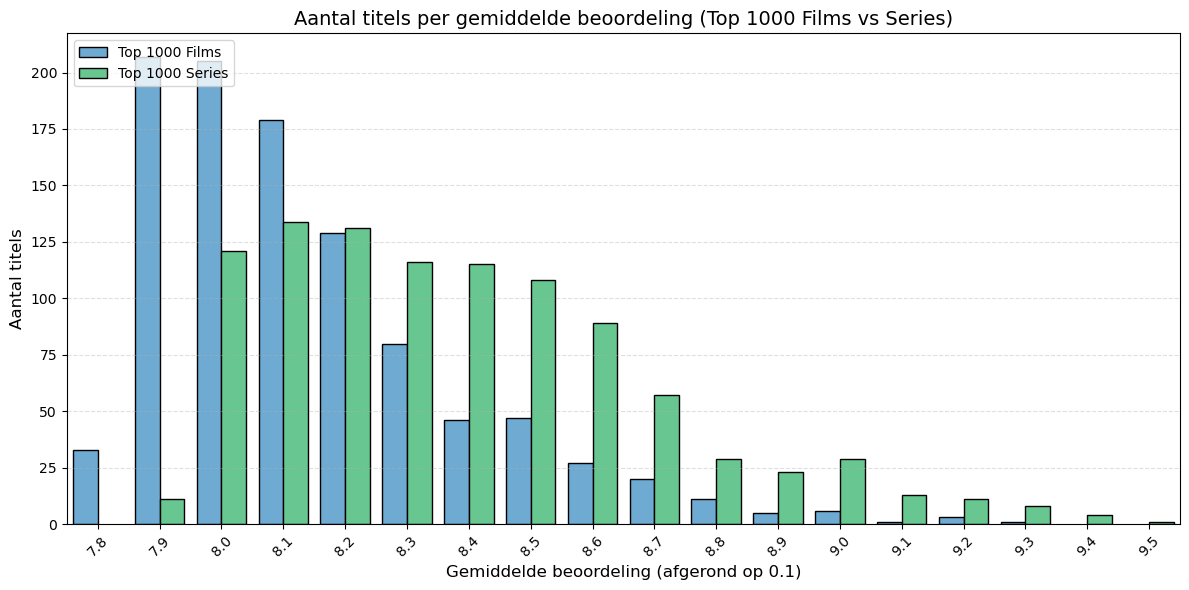

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
movies_df = pd.read_csv("movies.csv")
series_df = pd.read_csv("tvseries.csv")

# Count number of titles per rating
movies_counts = movies_df["averageRating"].value_counts().sort_index()
series_counts = series_df["averageRating"].value_counts().sort_index()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    "rating": movies_counts.index.tolist() + series_counts.index.tolist(),
    "count": list(movies_counts.values) + list(series_counts.values),
    "type": ["Top 1000 Films"] * len(movies_counts) + ["Top 1000 Series"] * len(series_counts)
})

# Round ratings to 1 decimal for nicer grouping
combined_df["rating"] = combined_df["rating"].round(1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_df,
    x="rating",
    y="count",
    hue="type",
    palette=["#5DADE2", "#58D68D"],
    edgecolor="black"

)

plt.title("Aantal titels per gemiddelde beoordeling (Top 1000 Films vs Series)", fontsize=14)
plt.xlabel("Gemiddelde beoordeling (afgerond op 0.1)", fontsize=12)
plt.ylabel("Aantal titels", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="", loc="upper left")
plt.tight_layout()
plt.show()


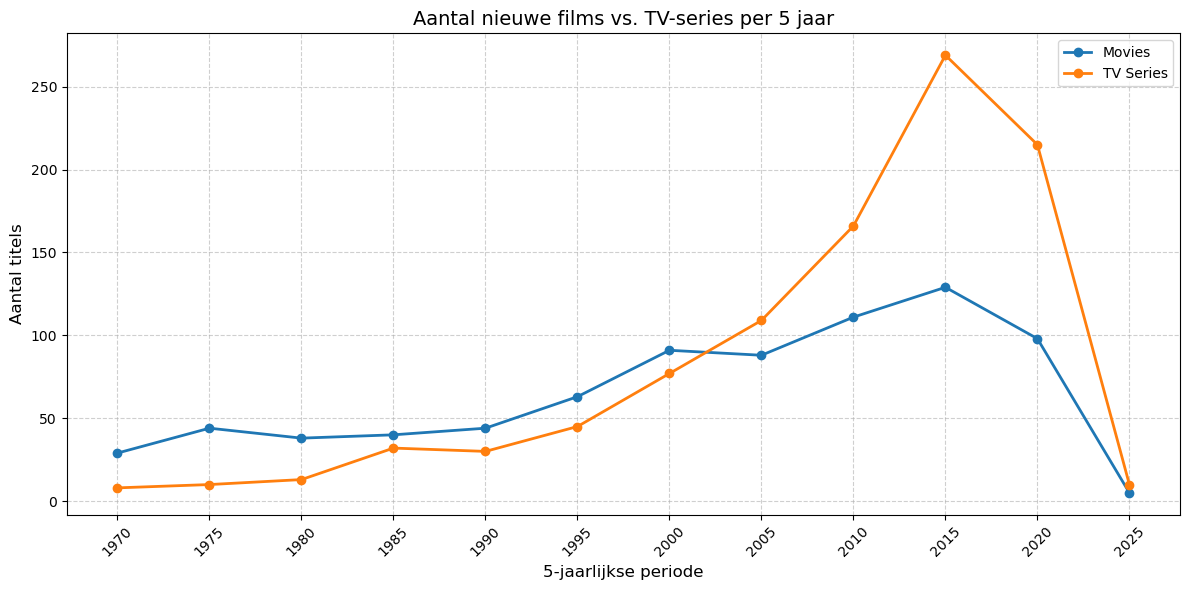

In [128]:
# Laad de data (vervang 'tvseries.csv' met jouw bestand)
movies = pd.read_csv('movies.csv')
tvseries = pd.read_csv('tvseries.csv')  # Zorg dat dit bestand bestaat

# Functie om jaren af te ronden naar 5-jarige intervallen (bijv. 1993 -> 1995)
def round_to_5yr(year):
    return (year // 5) * 5

# Pas toe op beide datasets
movies['releasePeriod'] = movies['releaseYear'].apply(round_to_5yr)
tvseries['releasePeriod'] = tvseries['releaseYear'].apply(round_to_5yr)

# Tel aantal titels per periode
movies_per_period = movies['releasePeriod'].value_counts().sort_index()
tvseries_per_period = tvseries['releasePeriod'].value_counts().sort_index()

# Combineer in één DataFrame
combined = pd.DataFrame({
    'Movies': movies_per_period,
    'TV Series': tvseries_per_period
}).fillna(0).astype(int)  # Vervang NaN door 0

# Filter lege periodes (optioneel)
combined = combined[combined.index >= 1970]  # Toon vanaf 1970

# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Movies'], label='Movies', marker='o', linewidth=2)
plt.plot(combined.index, combined['TV Series'], label='TV Series', marker='o', linewidth=2)

# Titel en labels
plt.title('Aantal nieuwe films vs. TV-series per 5 jaar', fontsize=14)
plt.xlabel('5-jaarlijkse periode', fontsize=12)
plt.ylabel('Aantal titels', fontsize=12)
plt.xticks(combined.index, rotation=45)  # Toon alle periodes op x-as
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Toon grafiek
plt.tight_layout()  # Voorkom overlap labels
plt.show()

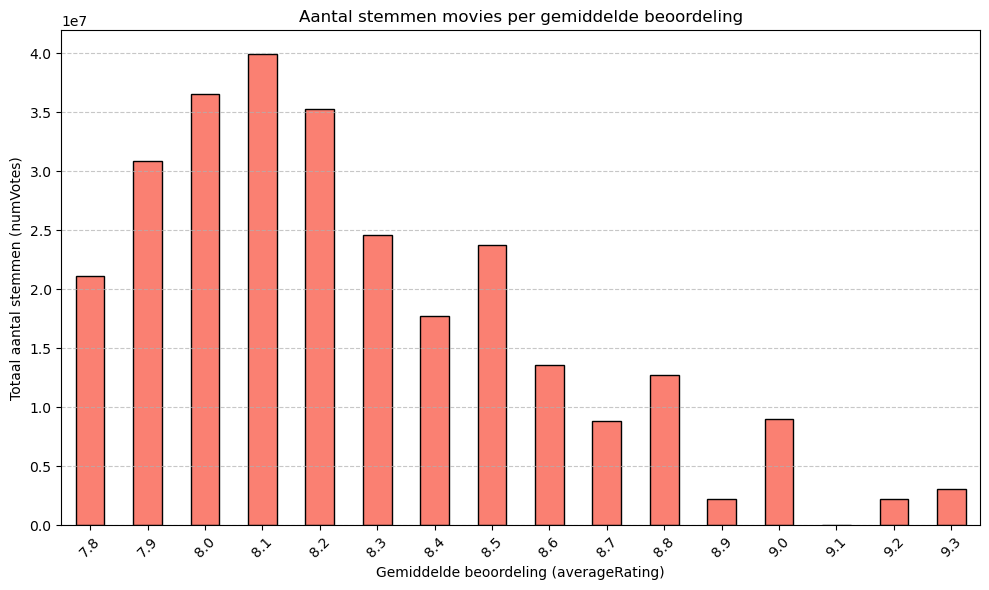

In [129]:
# 1. CSV inlezen
df = pd.read_csv("movies.csv")

# 2. Groepeer: som van stemmen per gemiddelde beoordeling
rating_votes = df.groupby("averageRating")["numVotes"].sum()

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_votes.plot(kind="bar", color="salmon", edgecolor="black")

plt.title("Aantal stemmen movies per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Totaal aantal stemmen (numVotes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


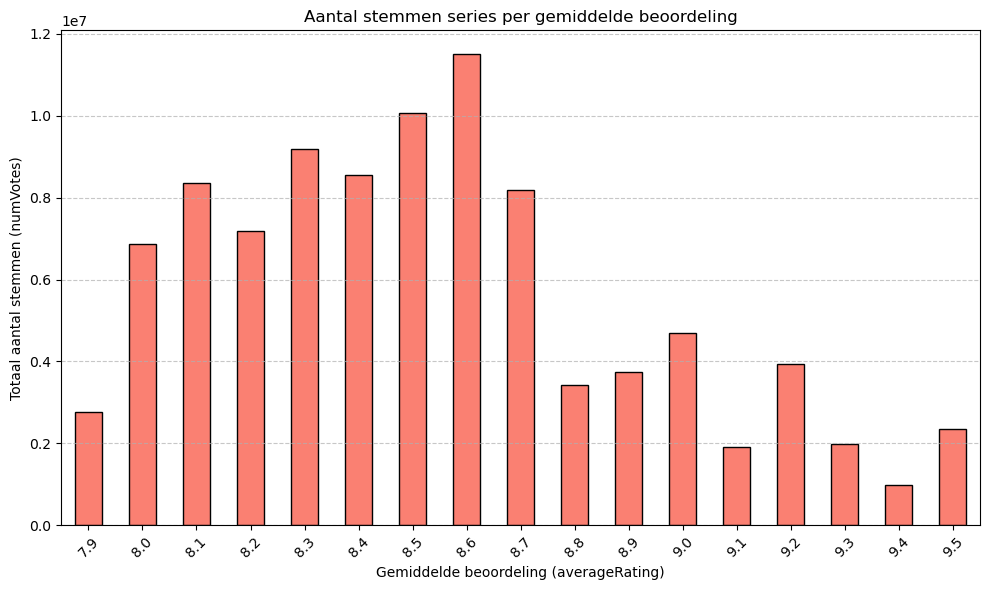

In [130]:
# 1. CSV inlezen
df = pd.read_csv("tvseries.csv")

# 2. Groepeer: som van stemmen per gemiddelde beoordeling
rating_votes = df.groupby("averageRating")["numVotes"].sum()

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_votes.plot(kind="bar", color="salmon", edgecolor="black")

plt.title("Aantal stemmen series per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Totaal aantal stemmen (numVotes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [131]:
df = pd.read_csv("movies.csv")

#Splits genres in aparte rijen (één genre per rij)
df = df.assign(genres=df["genres"].str.split(",")).explode("genres")

df["genres"] = df["genres"].str.strip()
# Bereken gemiddelde rating en som van votes per genre
genre_stats = df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    numMovies=("title", "count"),  # Aantal films per genre
).reset_index()



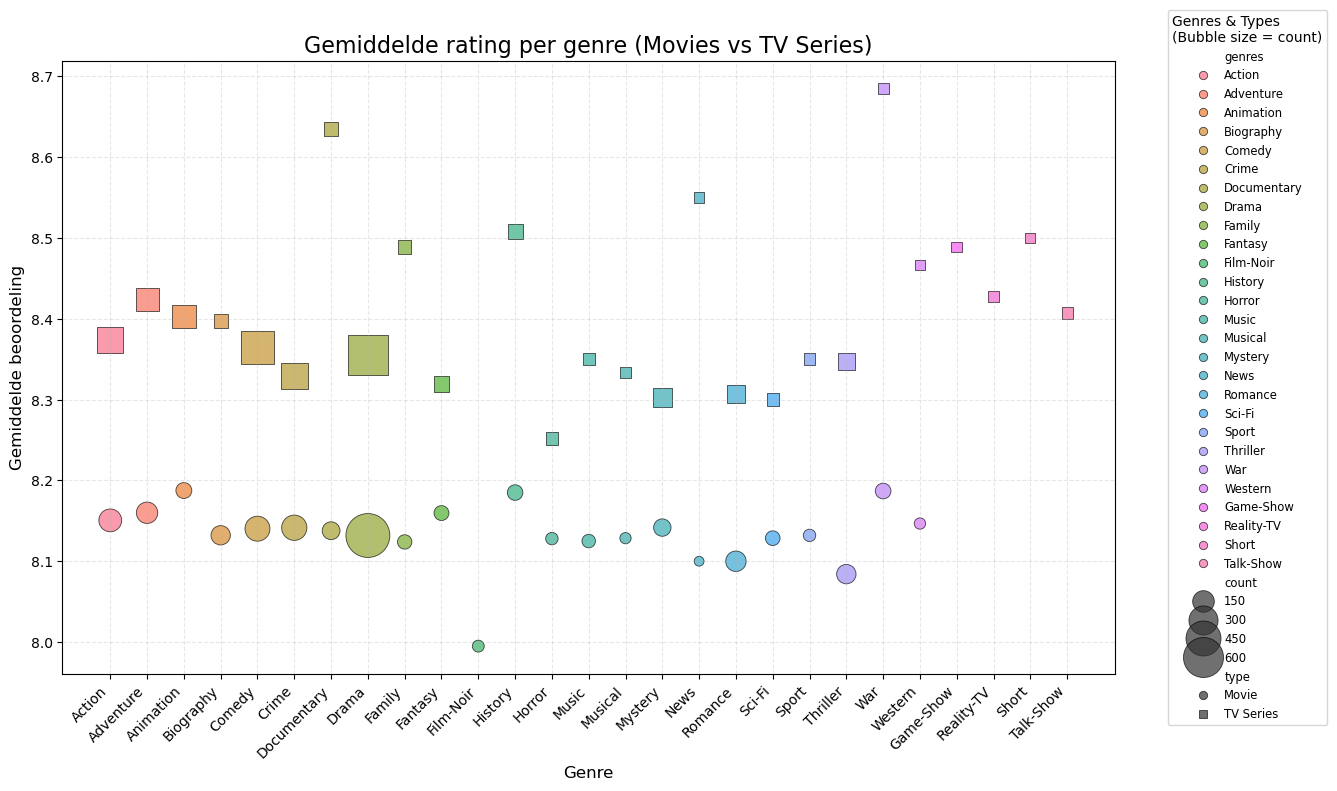

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare movies data
movies_df = pd.read_csv("movies.csv")
movies_df = movies_df.assign(genres=movies_df["genres"].str.split(",")).explode("genres")
movies_df["genres"] = movies_df["genres"].str.strip()
movies_stats = movies_df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    count=("title", "count"),
).reset_index()
movies_stats['type'] = 'Movie'  # Add type column

# Load and prepare TV series data
series_df = pd.read_csv("tvseries.csv")
series_df = series_df.assign(genres=series_df["genres"].str.split(",")).explode("genres")
series_df["genres"] = series_df["genres"].str.strip()
series_stats = series_df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    count=("title", "count"),
).reset_index()
series_stats['type'] = 'TV Series'  # Add type column

# Combine both datasets
combined_stats = pd.concat([movies_stats, series_stats])

plt.figure(figsize=(14, 8))
markers = {"Movie": "o", "TV Series": "s"}  # Circle for movies, square for TV

# Create bubble chart with different markers for movies and TV series
scatter = sns.scatterplot(
    data=combined_stats,
    x="genres",
    y="averageRating",
    size="count",
    sizes=(50, 1000),  # Adjust size range as needed
    hue="genres",      # Rainbow colors by genre
    style="type",      # Different markers for Movie/TV Series
    markers=markers,  # Custom markers
    edgecolor="black", # Outline for all bubbles
    alpha=0.7,
    palette="husl",    # Rainbow color palette
    legend="brief"
)

plt.title("Gemiddelde rating per genre (Movies vs TV Series)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Gemiddelde beoordeling", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Customize legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles,
    labels,
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0,
    title="Genres & Types\n(Bubble size = count)",
    fontsize='small',
    title_fontsize='medium'
)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()